In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
from adjustText import adjust_text
from matplotlib import gridspec
%matplotlib inline

# PGS Final Plot

In [2]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results')
df = pd.read_csv("pgs_linear_results_five.txt",sep='\t')

df['Sex'] = df['Sex'].replace(['female'],'f')
df['Sex'] = df['Sex'].replace(['male'],'m')

df_sep = df.copy().loc[df.Sex != 'combined']
df_sep['Phenotype'] = df_sep['Phenotype'] + '_' + df_sep['Sex']

df_sep_f = df_sep.loc[df.Sex == 'f']
df_sep_m = df_sep.loc[df.Sex == 'm']
df_comb = df.loc[df.Sex == 'combined']

df.tail()

,Phenotype,Sex,ab_r2,ab_r2_se,ab_inc_r2,ab_inc_r2_se,as_r2,as_r2_se,as_inc_r2,as_incr2_se,m_r2,m_r2_se,m_inc_r2,m_inc_r2_se
7,Waist:hip (bmi adj.),f,0.0652,0.0014,0.0434,0.0016,0.0719,0.0006,0.0501,0.0011,0.1915,0.1218,0.1697,0.1214
8,Waist:hip (bmi adj.),m,0.0597,0.0012,0.0163,0.0008,0.0558,0.0009,0.0124,0.0004,0.1292,0.0737,0.0857,0.0741
9,BMI,combined,0.0690,0.0013,0.0584,0.0012,0.0458,0.0009,0.0351,0.0009,0.0653,0.0020,0.0547,0.0021
10,BMI,f,0.0646,0.0015,0.0588,0.0013,0.0422,0.0006,0.0363,0.0009,0.0607,0.0023,0.0550,0.0021
11,BMI,m,0.0625,0.0019,0.0601,0.0020,0.0370,0.0017,0.0346,0.0017,0.0588,0.0020,0.0565,0.0019


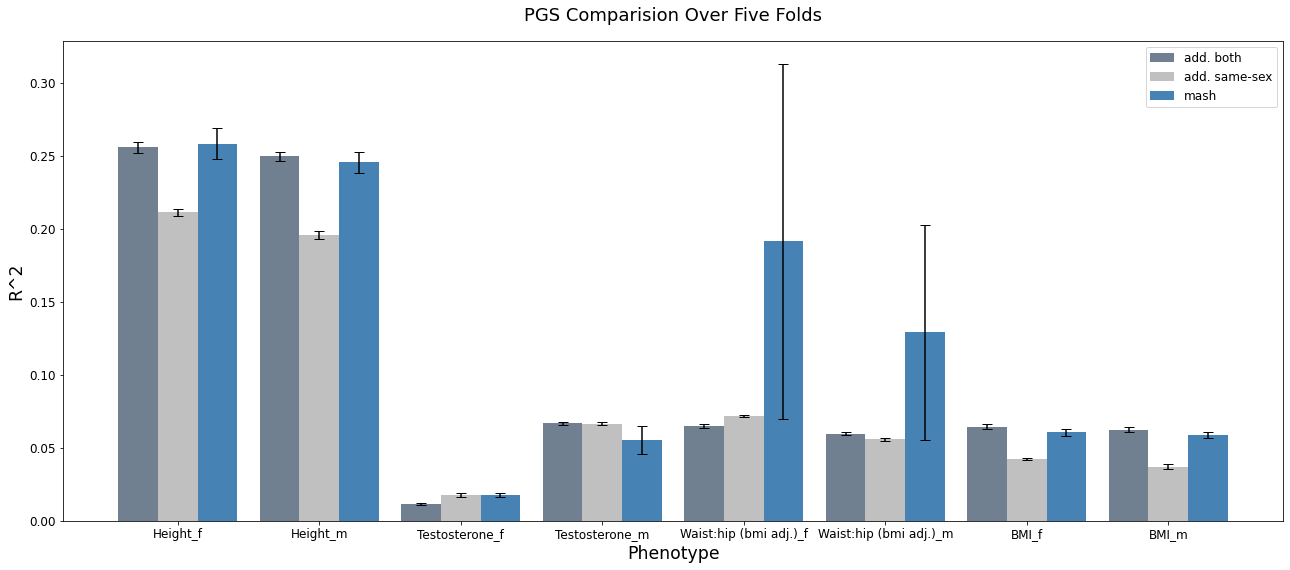

In [7]:
fig, ax = plt.subplots(figsize=(18,8))
x_f= np.arange(0,2*len(df_sep_f['Phenotype']),2)
x_m= np.arange(1,2*len(df_sep_m['Phenotype']),2)

width = 0.28
#female
rects1 = ax.bar(x_f - width, df_sep_f['ab_r2'], width, yerr= df_sep_f['ab_r2_se'], label = 'add. both',color='slategrey', capsize=5)
rects2 = ax.bar(x_f, df_sep_f['as_r2'], width, yerr= df_sep_f['as_r2_se'], label = 'add. same-sex',color='silver', capsize=5)
rects3 = ax.bar(x_f + width, df_sep_f['m_r2'], width, yerr= df_sep_f['m_r2_se'], label = 'mash',color='steelblue', capsize=5)

#male
rects4 = ax.bar(x_m - width, df_sep_m['ab_r2'], width, yerr= df_sep_m['ab_r2_se'], color='slategrey', capsize=5)
rects5 = ax.bar(x_m, df_sep_m['as_r2'], width, yerr= df_sep_m['as_r2_se'], color='silver', capsize=5)
rects6 = ax.bar(x_m + width, df_sep_m['m_r2'], width, yerr= df_sep_m['m_r2_se'], color='steelblue', capsize=5)

ax.legend(fontsize='large')
ax.set_xticks(np.arange(len(df_sep['Phenotype'])))
ax.set_xticklabels(df_sep['Phenotype'],fontsize='x-large')
ax.tick_params(labelsize="large", labeltop=False, top=False)
ax.set_ylabel("R^2",fontsize='xx-large')
ax.set_xlabel("Phenotype",fontsize='xx-large')
ax.set_title("PGS Comparision Over Five Folds",fontsize=18,pad=20)

fig.tight_layout(pad=1)
plt.savefig("PGS_comparison_five.pdf")

# PGS Comparison Plots

In [2]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results')
df = pd.read_csv("pgs_linear_results.txt",sep='\t',dtype={'addboth_p':str,'add_p':str,'mash_p':str})

df['addboth'] = df['addboth_p'] + ', ' + df['addboth_SNP'].astype(str)
df['add'] = df['add_p'] + ', ' + df['add_SNP'].astype(str)
df['mash'] = df['mash_p'] + ', ' + df['mash_SNP'].astype(str)

df['Sex'] = df['Sex'].replace(['female'],'f')
df['Sex'] = df['Sex'].replace(['male'],'m')
df_sep = df.copy().loc[df.Sex != 'combined']
df_sep['Phenotype'] = df_sep['Phenotype'] + '_' + df_sep['Sex']

df_sep_f = df_sep.loc[df.Sex == 'f']
df_sep_m = df_sep.loc[df.Sex == 'm']
df_comb = df.loc[df.Sex == 'combined']

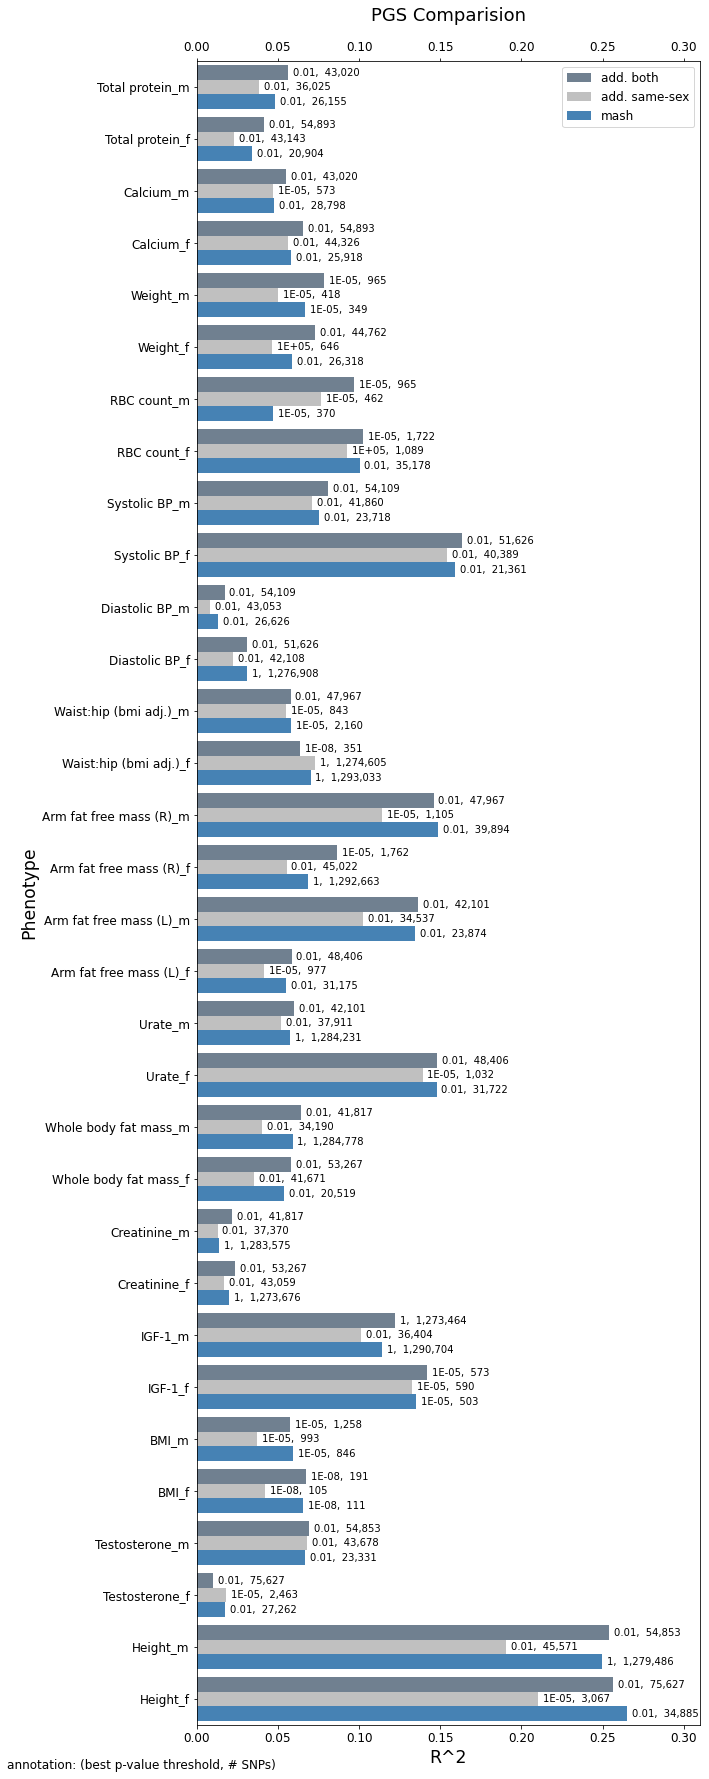

In [5]:
fig, ax = plt.subplots(figsize=(10,25))
x_f= np.arange(0,2*len(df_sep_f['Phenotype']),2)
x_m= np.arange(1,2*len(df_sep_m['Phenotype']),2)

width = 0.28
#female
rects1 = ax.barh(x_f + width, df_sep_f['addboth_r2'], width, label = 'add. both',color='slategrey')
rects2 = ax.barh(x_f, df_sep_f['add_r2'], width, label = 'add. same-sex',color='silver')
rects3 = ax.barh(x_f - width, df_sep_f['mash_r2'], width, label = 'mash',color='steelblue')
#male
rects4 = ax.barh(x_m + width, df_sep_m['addboth_r2'], width, color='slategrey')
rects5 = ax.barh(x_m, df_sep_m['add_r2'], width, color='silver')
rects6 = ax.barh(x_m - width, df_sep_m['mash_r2'], width, color='steelblue')

ax.legend(fontsize='large')
ax.set_yticks(np.arange(len(df_sep['Phenotype'])))
ax.set_yticklabels(df_sep['Phenotype'],fontsize='x-large')
ax.tick_params(labelsize="large", labeltop=True, top=True)
ax.set_xlabel("R^2",fontsize='xx-large')
ax.set_ylabel("Phenotype",fontsize='xx-large')
ax.set_title("PGS Comparision",fontsize=18,pad=20)
ax.set_ylim(-0.5,31.5)
ax.set_xlim(0,0.31)


addboth_rects = rects1.patches + rects4.patches
addboth_labels = df_sep['addboth']
add_rects = rects2.patches + rects5.patches
add_labels = df_sep['add']
mash_rects = rects3.patches + rects6.patches
mash_labels = df_sep['mash']

patches = [rects1.patches + rects4.patches, rects2.patches + rects5.patches, rects3.patches + rects6.patches]
df_labels = [df_sep['addboth'], df_sep['add'], df_sep['mash']]
for i in range(len(patches)):
    for rect, label in zip(patches[i], df_labels[i]):
        width = rect.get_width()+0.003
        y_pos = rect.get_y() +rect.get_height() - 0.14
        ax.text(width, y_pos, label, va="center")
plt.figtext(0.01, 0.01, 'annotation: (best p-value threshold, # SNPs)', fontsize='large')

fig.tight_layout(pad=2)
#plt.savefig("PGS_comparison_r2.pdf")

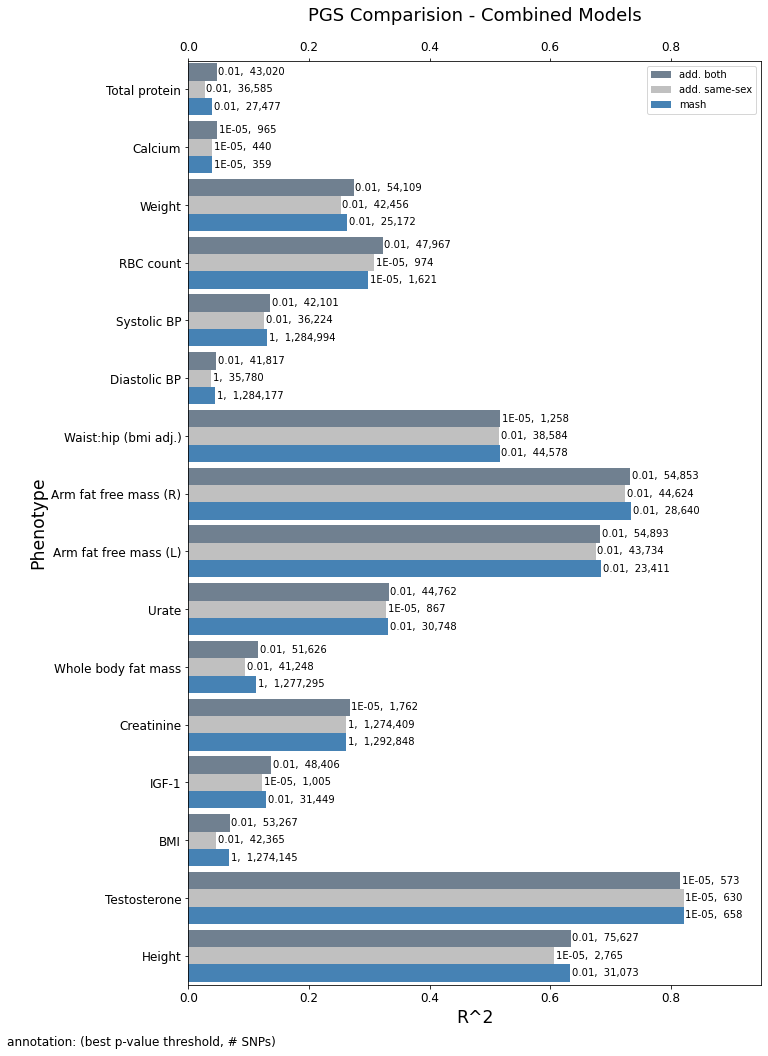

In [93]:
fig, ax = plt.subplots(figsize=(11,15))
y= np.arange(len(df_comb['Phenotype']))
width = 0.30
rects1 = ax.barh(y + width, df_comb['addboth_r2'], width, label = 'add. both',color='slategrey')
rects2 = ax.barh(y, df_comb['add_r2'], width, label = 'add. same-sex',color='silver')
rects3 = ax.barh(y - width, df_comb['mash_r2'], width, label = 'mash',color='steelblue')

ax.set_yticks(y)
ax.legend()
ax.set_yticklabels(df_comb['Phenotype'],fontsize='large')
ax.tick_params(labelsize="large", labeltop=True, top=True)
ax.set_xlabel("R^2",fontsize='xx-large')
ax.set_ylabel("Phenotype",fontsize='xx-large')
ax.set_title("PGS Comparision - Combined Models",fontsize=18,pad=20)
ax.set_ylim(-0.5,15.5)
ax.set_xlim(0,0.95)

patches = [rects1.patches, rects2.patches, rects3.patches]
df_labels = [df_comb['addboth'], df_comb['add'], df_comb['mash']]
for i in range(len(patches)):
    for rect, label in zip(patches[i], df_labels[i]):
        width = rect.get_width()+0.003
        y_pos = rect.get_y() +rect.get_height() - 0.14
        ax.text(width, y_pos, label, va="center")
plt.figtext(0.01, 0.01, 'annotation: (best p-value threshold, # SNPs)', fontsize='large')

fig.tight_layout(pad=3)
#plt.savefig("PGS_comparison-combined_r2.pdf")

### Binary PGS Plot

In [3]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results')
df = pd.read_csv("pgs_logistic_results.txt",sep='\t',dtype={'addboth_p':str,'add_p':str,'mash_p':str})

df['addboth'] = df['addboth_p'] + ', ' + df['addboth_SNP'].astype(str)
df['add'] = df['add_p'] + ', ' + df['add_SNP'].astype(str)
df['mash'] = df['mash_p'] + ', ' + df['mash_SNP'].astype(str)

df['Sex'] = df['Sex'].replace(['female'],'f')
df['Sex'] = df['Sex'].replace(['male'],'m')
df_sep = df.copy().loc[df.Sex != 'combined']
df_sep['Phenotype'] = df_sep['Phenotype'] + '_' + df_sep['Sex']

df_sep_f = df_sep.loc[df.Sex == 'f']
df_sep_m = df_sep.loc[df.Sex == 'm']
df_comb = df.loc[df.Sex == 'combined']

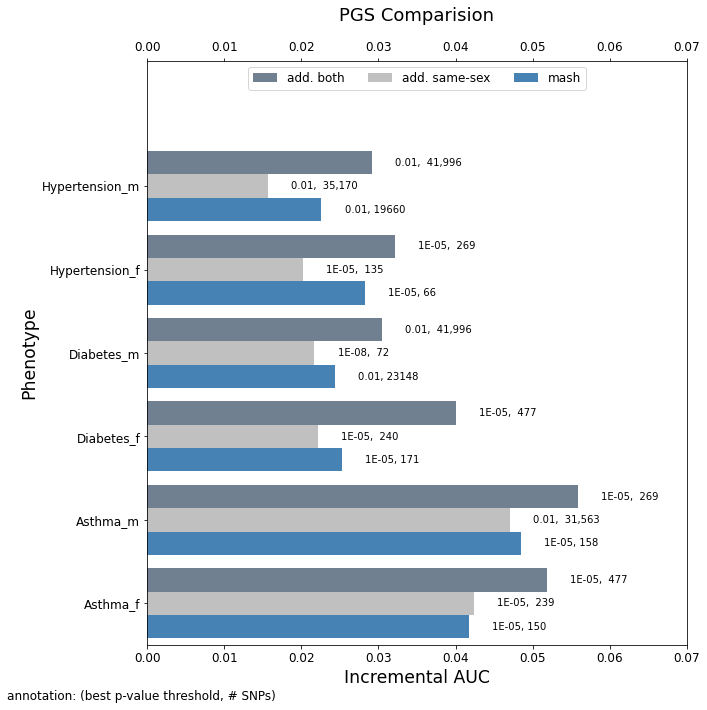

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
x_f= np.arange(0,2*len(df_sep_f['Phenotype']),2)
x_m= np.arange(1,2*len(df_sep_m['Phenotype']),2)

width = 0.28
#female
rects1 = ax.barh(x_f + width, df_sep_f['addboth_inc_auc'], width, label = 'add. both',color='slategrey')
rects2 = ax.barh(x_f, df_sep_f['add_inc_auc'], width, label = 'add. same-sex',color='silver')
rects3 = ax.barh(x_f - width, df_sep_f['mash_inc_auc'], width, label = 'mash',color='steelblue')
#male
rects4 = ax.barh(x_m + width, df_sep_m['addboth_inc_auc'], width, color='slategrey')
rects5 = ax.barh(x_m, df_sep_m['add_inc_auc'], width, color='silver')
rects6 = ax.barh(x_m - width, df_sep_m['mash_inc_auc'], width, color='steelblue')

ax.legend(fontsize='large', ncol=3, loc='upper center')
ax.set_yticks(np.arange(len(df_sep['Phenotype'])))
ax.set_yticklabels(df_sep['Phenotype'],fontsize='x-large')
ax.tick_params(labelsize="large", labeltop=True, top=True)
ax.set_xlabel("Incremental AUC",fontsize='xx-large')
ax.set_ylabel("Phenotype",fontsize='xx-large')
ax.set_title("PGS Comparision",fontsize=18,pad=20)
ax.set_ylim(-0.5,6.5)
ax.set_xlim(0,0.07)


addboth_rects = rects1.patches + rects4.patches
addboth_labels = df_sep['addboth']
add_rects = rects2.patches + rects5.patches
add_labels = df_sep['add']
mash_rects = rects3.patches + rects6.patches
mash_labels = df_sep['mash']

patches = [rects1.patches + rects4.patches, rects2.patches + rects5.patches, rects3.patches + rects6.patches]
df_labels = [df_sep['addboth'], df_sep['add'], df_sep['mash']]
for i in range(len(patches)):
    for rect, label in zip(patches[i], df_labels[i]):
        width = rect.get_width()+0.003
        y_pos = rect.get_y() +rect.get_height() - 0.14
        ax.text(width, y_pos, label, va="center")
plt.figtext(0.01, 0.01, 'annotation: (best p-value threshold, # SNPs)', fontsize='large')

fig.tight_layout(pad=2)
plt.savefig("PGS_comparison_logistic_incauc.pdf")

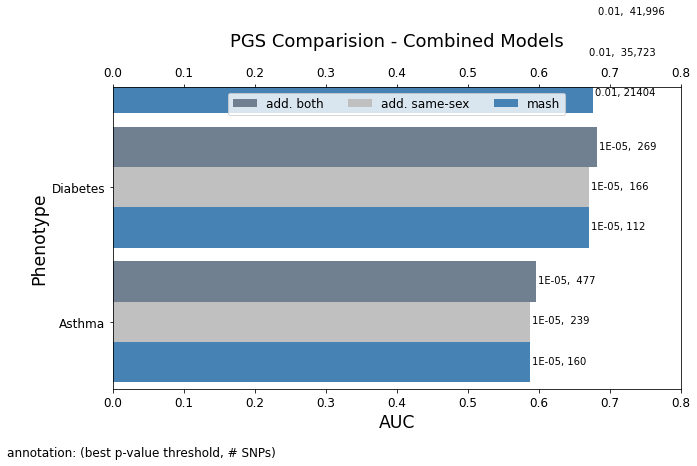

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
y= np.arange(len(df_comb['Phenotype']))
width = 0.30
rects1 = ax.barh(y + width, df_comb['addboth_auc'], width, label = 'add. both',color='slategrey')
rects2 = ax.barh(y, df_comb['add_auc'], width, label = 'add. same-sex',color='silver')
rects3 = ax.barh(y - width, df_comb['mash_auc'], width, label = 'mash',color='steelblue')

ax.set_yticks(y)
ax.legend(fontsize='large', ncol=3, loc='upper center')
ax.set_yticklabels(df_comb['Phenotype'],fontsize='large')
ax.tick_params(labelsize="large", labeltop=True, top=True)
ax.set_xlabel("AUC",fontsize='xx-large')
ax.set_ylabel("Phenotype",fontsize='xx-large')
ax.set_title("PGS Comparision - Combined Models",fontsize=18,pad=20)
ax.set_ylim(-0.5,1.75)
ax.set_xlim(0,0.8)

patches = [rects1.patches, rects2.patches, rects3.patches]
df_labels = [df_comb['addboth'], df_comb['add'], df_comb['mash']]
for i in range(len(patches)):
    for rect, label in zip(patches[i], df_labels[i]):
        width = rect.get_width()+0.003
        y_pos = rect.get_y() +rect.get_height() - 0.14
        ax.text(width, y_pos, label, va="center")
plt.figtext(0.01, 0.01, 'annotation: (best p-value threshold, # SNPs)', fontsize='large')

fig.tight_layout(pad=3)
plt.savefig("PGS_comparison-combined_auc.pdf")

## R2 by Heritability

In [11]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results')
pgs_df = pd.read_csv("pgs_linear_results.txt",sep='\t',dtype={'addboth_p':str,'add_p':str,'mash_p':str})
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\LDSC')
h2_df = pd.read_csv("ldsc_results.txt",sep='\t')

In [17]:
h2_df = h2_df.loc[h2_df['Phenotype'].isin(pgs_df['Phenotype'])]
pgs_df = pgs_df.loc[pgs_df['Phenotype'].isin(h2_df['Phenotype'])]

In [18]:
both_h2_df = h2_df.loc[h2_df['Sex']=='both_sex']
pgs_df['addboth to mash'] = pgs_df['addboth_r2'] / pgs_df['mash_r2'] 

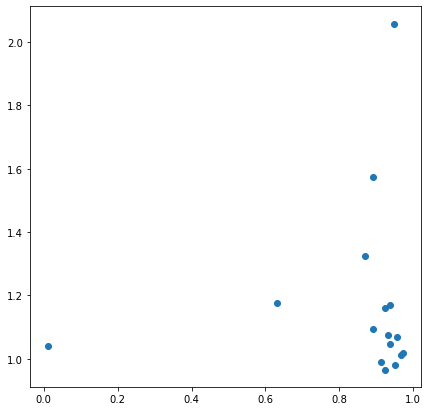

In [20]:
fig, ax = plt.subplots(figsize=(7,7))
x = h2_df.loc[h2_df['Sex']=='both_sex', ['Correlation']]
y = pgs_df.loc[pgs_df['Sex'] == 'male', ['addboth to mash']]
ax.scatter(x, y)

